# Credit Risk Modeling 

Objective - to predict Probability of Default (PD)

# Exploring the Data

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
cd ../gdrive/My Drive/Colab Notebooks/_AI for Finance/Project 4 - Credit Risk Modelling

/gdrive/My Drive/Colab Notebooks/_AI for Finance/Project 4 - Credit Risk Modelling


In [5]:
cr_loan = pd.read_csv('bank_loan2.csv')

In [6]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
cr_loan.shape

(32581, 12)

In [9]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


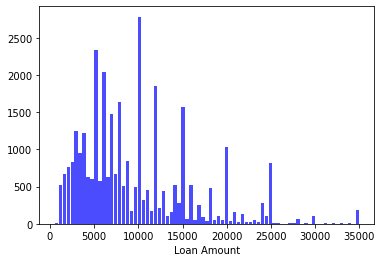

In [10]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

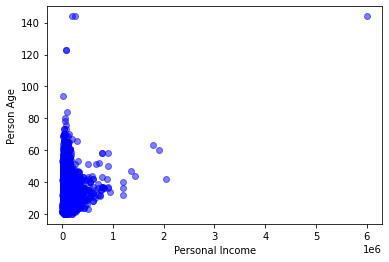

In [11]:
#exploring the relationship between income and age

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

In [12]:
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [13]:
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [14]:
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


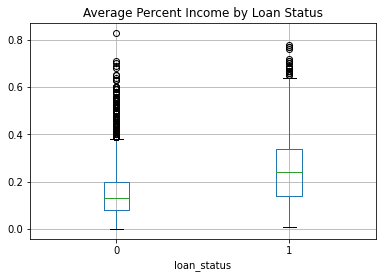

In [15]:
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

### Outlier Detection

In [16]:
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


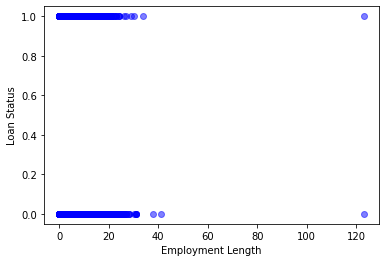

In [17]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_status'], c='blue', alpha=0.5)
plt.xlabel("Employment Length")
plt.ylabel("Loan Status")
plt.show()

In [18]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Dropping the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

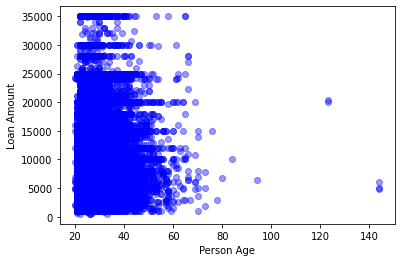

In [19]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'], c='blue', alpha=0.4)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [20]:
cr_loan_new = cr_loan_new.drop(cr_loan_new[cr_loan_new['person_age'] > 100].index)

In [21]:
import matplotlib

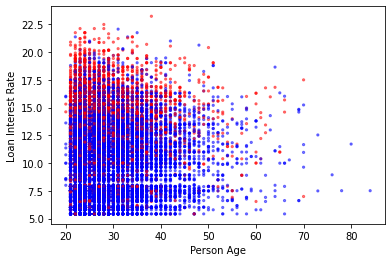

In [22]:
# Create a scatter plot of age and interest rate
fig, ax = plt.subplots()

colors = ["blue","red"]

ax.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'], marker = 'o', s = 5,
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)

ax.set_xlabel("Person Age")
ax.set_ylabel("Loan Interest Rate")

plt.show()

### Imputing Missing Data

In [23]:
cr_loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [24]:
print(cr_loan_new.columns[cr_loan_new.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [25]:
cr_loan_new[cr_loan_new['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [26]:
cr_loan_new['person_emp_length'].fillna((cr_loan_new['person_emp_length'].median()), inplace=True)

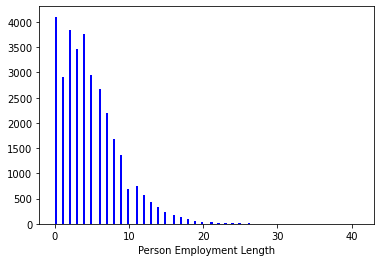

In [27]:
n, bins, patches = plt.hist(cr_loan_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [28]:
print(cr_loan_new['loan_int_rate'].isnull().sum())

3115


In [29]:
indices = cr_loan_new[cr_loan_new['loan_int_rate'].isnull()].index
cr_loan_clean = cr_loan_new.drop(indices)

In [30]:
cr_loan_clean['person_home_ownership'].value_counts()

RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

# Logistic Regression for Probability of Default

In [31]:
from sklearn.linear_model import LogisticRegression

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


In [32]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

# the intercept is actually the log odds of non-default.

[-4.21645549]


In [33]:
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


In [34]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [35]:
#Split the clean dataset again

X = cr_loan_prep.drop('loan_status', axis=1)
y = cr_loan_prep[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [36]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.445779
1            1      0.223447
2            0      0.288558
3            0      0.169358
4            1      0.114182


In [37]:
logreg_preds = pd.DataFrame(preds[:,1], columns = ['logreg_prob_default'])

### Model Evaluation

In [38]:
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.17 meaning 17% of our true defaults were predicted correctly. This most certainly means our threshold value of 0.5 is not the best choice in this scenario.

In [39]:
from sklearn.metrics import precision_recall_fscore_support

In [40]:
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586]))


In [41]:
print(clf_logistic.score(X_test, y_test))

0.8025288526816021


### Visually scoring credit models

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

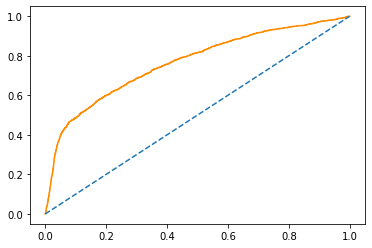

In [43]:
# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

In [44]:
print(auc)

0.7643248801355148


### What is the optimal threshold?

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9023  175]
 [2152  434]]


In [47]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8476  722]
 [1386 1200]]


Calculating the impact of 0.4 threshold on the model performance.

In [48]:
avg_loan_amnt = np.mean(cr_loan_prep['loan_amnt'])

In [49]:
# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

In [50]:
# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9872265.223119883


The threshold of 0.275 is a good starting point, albeit impractical. 

# EXTREME GRADIENT BOOSTED MODEL

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [53]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.940435
1            1      0.922014
2            0      0.021707
3            0      0.026483
4            1      0.064803


In [54]:
xgbt_preds = pd.DataFrame(gbt_preds[:,1], columns = ['xgbt_prob_default'])

We will now compare the predictions of logistic regression with the XgBoost predictions.

In [55]:
loan_amnt = pd.DataFrame(X_test['loan_amnt'])

In [56]:
loan_amnt

,loan_amnt
31622,15000
24935,11200
15342,15000
3460,10800
16424,3000
...,...
25231,8000
30380,6600
29849,16000
1780,6000


In [57]:
loan_status_amnt = pd.concat([y_test,loan_amnt], axis = 1)

In [58]:
portfolio = pd.concat([logreg_preds, xgbt_preds, loan_status_amnt.reset_index(drop = True)], axis = 1)

In [59]:
portfolio.head()

,logreg_prob_default,xgbt_prob_default,loan_status,loan_amnt
0,0.445779,0.940435,1,15000
1,0.223447,0.922014,1,11200
2,0.288558,0.021707,0,15000
3,0.169358,0.026483,0,10800
4,0.114182,0.064803,1,3000


Calculating Expected loss assuming lgd = 20%

In [60]:
portfolio['lgd'] = 0.2

In [61]:
portfolio.head()

,logreg_prob_default,xgbt_prob_default,loan_status,loan_amnt,lgd
0,0.445779,0.940435,1,15000,0.2
1,0.223447,0.922014,1,11200,0.2
2,0.288558,0.021707,0,15000,0.2
3,0.169358,0.026483,0,10800,0.2
4,0.114182,0.064803,1,3000,0.2


In [62]:
# Create expected loss columns for each model using the formula
portfolio['xgbt_expected_loss'] = portfolio['xgbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['logreg_expected_loss'] = portfolio['logreg_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['logreg_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['xgbt_expected_loss']))

LR expected loss:  5596776.979852879
GBT expected loss:  5447712.9423716515


In [63]:
xgbt_predictions = clf_gbt.predict(X_test)

In [64]:
print(xgbt_predictions)

[1 1 0 ... 0 0 0]


In [65]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, xgbt_predictions, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9198
     Default       0.93      0.69      0.80      2586

    accuracy                           0.92     11784
   macro avg       0.93      0.84      0.87     11784
weighted avg       0.92      0.92      0.92     11784



In [66]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [68]:
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 121, 'loan_int_rate': 183, 'person_income': 278, 'person_home_ownership_MORTGAGE': 39, 'loan_amnt': 47, 'loan_grade_F': 6}


In [69]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

In [70]:
X2_train, X2_test, X3_train, X3_test = train_test_split(X2, X3, test_size=.4, random_state=123)

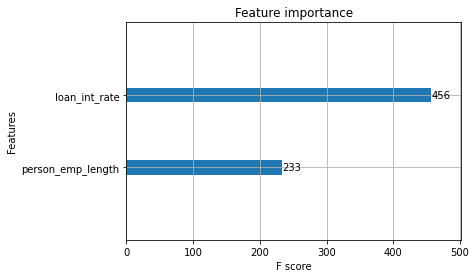

In [71]:
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

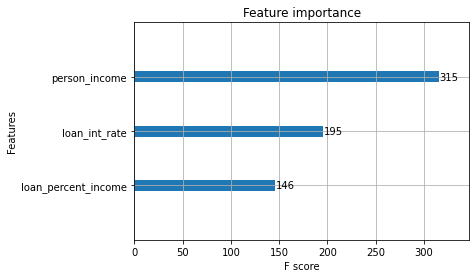

In [72]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [73]:
# Predict the loan_status using each model
gbt_preds = clf_gbt.predict(X_test)
gbt2_preds = clf_gbt2.predict(X2_test)
gbt3_preds = clf_gbt3.predict(X3_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

# Print the classification report of the third model
print(classification_report(y_test, gbt3_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.95      0.92      9198
     Default       0.79      0.61      0.69      2586

    accuracy                           0.88     11784
   macro avg       0.84      0.78      0.81     11784
weighted avg       0.87      0.88      0.87     11784

              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89      9198
     Default       0.68      0.26      0.38      2586

    accuracy                           0.81     11784
   macro avg       0.75      0.61      0.63     11784
weighted avg       0.79      0.81      0.78     11784

              precision    recall  f1-score   support

 Non-Default       0.89      0.93      0.91      9198
     Default       0.72      0.60      0.66      2586

    accuracy                           0.86     11784
   macro avg       0.80      0.77      0.78     11784
weighted avg       0.85      0.86      0.86     11784



### Cross Validating Credit Models

In [74]:
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

In [75]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.884537       0.001848       0.877218      0.005511
1        0.892087       0.002086       0.883282      0.007081
2        0.896208       0.002214       0.885650      0.006140
3        0.898414       0.002245       0.886062      0.006838
4        0.900582       0.002823       0.887498      0.006857


In [76]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

In [77]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.89002037 0.88798371 0.89069925 0.870756  ]
Average accuracy: 0.88 (+/- 0.02)


### Modelling after Undersampling

In [78]:
#Split the clean dataset again

X = cr_loan_prep.drop('loan_status', axis=1)
y = cr_loan_prep[['loan_status']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [80]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)

count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [81]:
count_nondefault

13798

In [82]:
count_default

3877

In [83]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

0    3877
1    3877
Name: loan_status, dtype: int64


In [84]:
X_train_under = X_y_train_under.drop('loan_status', axis =1)
y_train_under = X_y_train_under[['loan_status']]

In [85]:
clf_gbt_under = xgb.XGBClassifier().fit(X_train_under,np.ravel(y_train_under))

In [86]:
clf_gbt_under_preds = clf_gbt_under.predict(X_test)

In [87]:
gbt_proba = clf_gbt_under.predict_proba(X_test)

In [88]:
print(clf_gbt_under_preds)

[1 1 0 ... 0 1 0]


In [89]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, clf_gbt_under_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.94      0.91      0.92      9198
     Default       0.70      0.79      0.74      2586

    accuracy                           0.88     11784
   macro avg       0.82      0.85      0.83     11784
weighted avg       0.89      0.88      0.88     11784



In [90]:
print(confusion_matrix(y_test,clf_gbt_under_preds))

[[8327  871]
 [ 551 2035]]


In [91]:
print(roc_auc_score(y_test, clf_gbt_under_preds))

0.8461175611161308


# Model Evaluation and Implementation

In [92]:
d = {'prob_default': gbt_proba[:,1], 'loan_status': clf_gbt_under_preds}

# Create a dataframe for the probabilities of default
preds_df_gbt = pd.DataFrame(data = d)

In [93]:
# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.94      0.91      0.92      9198
     Default       0.70      0.79      0.74      2586

    accuracy                           0.88     11784
   macro avg       0.82      0.85      0.83     11784
weighted avg       0.89      0.88      0.88     11784



In [94]:
# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

0.8312050423340023


### ROC AUC

In [95]:
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, preds_df_gbt['prob_default'])

# in roc_curve() we put an array/series of probabilities not a multi column df

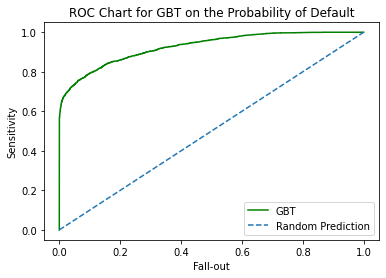

In [96]:
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [97]:
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_gbt['prob_default']))

Gradient Boosted Tree AUC Score: 0.93


### Model Calibration

In [98]:
from sklearn.calibration import calibration_curve

curve = calibration_curve(y_test, gbt_proba[:,1], n_bins = 20)


In [99]:
curve

(array([6.60938533e-04, 8.05729633e-03, 4.04411765e-02, 5.35168196e-02,
        7.33519034e-02, 1.08367627e-01, 1.13513514e-01, 1.04330709e-01,
        2.17054264e-01, 1.79012346e-01, 2.28571429e-01, 1.87500000e-01,
        3.19444444e-01, 2.67379679e-01, 3.53658537e-01, 3.68131868e-01,
        6.51685393e-01, 8.78048780e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.02505157, 0.07632592, 0.12487639, 0.17537217, 0.22279809,
        0.27219108, 0.32494317, 0.37230928, 0.42381265, 0.47482373,
        0.52523782, 0.57257501, 0.6262004 , 0.67538519, 0.7253423 ,
        0.77416599, 0.82703586, 0.87515   , 0.93173015, 0.97554557]))

In [100]:
frac_of_pos_gbt = curve[0]
mean_pred_val_gbt = curve[1]

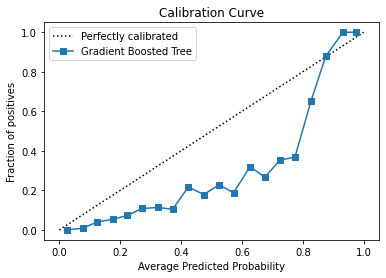

In [101]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

### Deciding on a Threshold

In [102]:
print(preds_df_gbt['prob_default'].describe())

count    11784.000000
mean         0.344643
std          0.308715
min          0.001566
25%          0.111237
50%          0.223992
75%          0.493205
max          0.999629
Name: prob_default, dtype: float64


In [103]:
threshold_85 = np.quantile(preds_df_gbt['prob_default'], 0.85)

In [104]:
print(threshold_85)

0.8197291404008865


In [105]:
preds_df_gbt['pred_loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

In [106]:
print(preds_df_gbt['pred_loan_status'].value_counts())

0    10016
1     1768
Name: pred_loan_status, dtype: int64


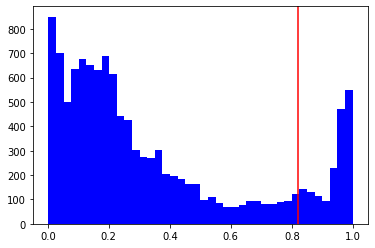

In [107]:
# Plot the predicted probabilities of default
plt.hist(preds_df_gbt['prob_default'], color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(preds_df_gbt['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

In [108]:
# Create a subset of only accepted loans
accepted_loans = preds_df_gbt[preds_df_gbt['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['loan_status']) / accepted_loans['loan_status'].count())

0.1136182108626198


In [109]:
preds_df_gbt_amnt = pd.concat([preds_df_gbt, X_test['loan_amnt'].reset_index(drop = True)],axis =1)

In [110]:
# BAD RATE IMPACT
avg_loan = np.mean(preds_df_gbt_amnt['loan_amnt'])

pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(preds_df_gbt_amnt['loan_status'],
                 preds_df_gbt_amnt['pred_loan_status']).apply(lambda x: x * avg_loan, axis = 0))

pred_loan_status              0              1
loan_status                                   
0                $84,840,688.86          $0.00
1                $10,875,051.13 $16,895,510.01


### CREDIT STRATEGY

In [111]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1,0.05]
thresholds = []
bad_rates = []
num_accepted_loans = []

In [112]:
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt_amnt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt_amnt['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    preds_df_gbt_amnt['pred_loan_status'] = preds_df_gbt_amnt['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = preds_df_gbt_amnt[preds_df_gbt_amnt['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))
    #Calculate and append number of loans accepted for given threshold
    num_accepted_loans.append(len(preds_df_gbt_amnt[preds_df_gbt_amnt['prob_default'] < thresh]))

In [113]:
pd.options.display.float_format = '{:,.3f}'.format

In [114]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, ),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0             1.000      1.000     0.247
1             0.950      0.973     0.207
2             0.900      0.936     0.163
3             0.850      0.820     0.114
4             0.800      0.659     0.058
5             0.750      0.493     0.000
6             0.700      0.409     0.000
7             0.650      0.350     0.000
8             0.600      0.295     0.000
9             0.550      0.257     0.000
10            0.500      0.224     0.000
11            0.450      0.200     0.000
12            0.400      0.179     0.000
13            0.350      0.155     0.000
14            0.300      0.133     0.000
15            0.250      0.111     0.000
16            0.200      0.090     0.000
17            0.150      0.062     0.000
18            0.100      0.038     0.000
19            0.050      0.019     0.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


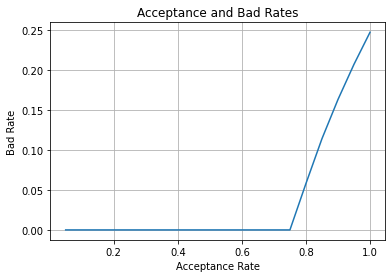

In [115]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [116]:
num_loans_df = pd.DataFrame(num_accepted_loans, columns = ['num_accepted_loans'])

In [117]:
num_loans_df.head()

,num_accepted_loans
0,11784
1,11198
2,10604
3,10018
4,9428


In [118]:
strat_df = pd.concat([strat_df, num_loans_df], axis = 1)

In [119]:
strat_df['Avg_loan_amnt'] = np.mean(preds_df_gbt_amnt['loan_amnt'])

In [120]:
strat_df['Estimated_Value'] = (strat_df['num_accepted_loans'] * (1 - strat_df['Bad Rate']) * strat_df['Avg_loan_amnt']) - (strat_df['num_accepted_loans'] * strat_df['Bad Rate'] * strat_df['Avg_loan_amnt'])

In [121]:
strat_df

,Acceptance Rate,Threshold,Bad Rate,num_accepted_loans,Avg_loan_amnt,Estimated_Value
0,1.000,1.000,0.247,11784,"9,556.284","56,981,292.500"
1,0.950,0.973,0.207,11198,"9,556.284","62,708,602.819"
2,0.900,0.936,0.163,10604,"9,556.284","68,299,678.753"
3,0.850,0.820,0.114,10018,"9,556.284","73,907,306.172"
4,0.800,0.659,0.058,9428,"9,556.284","79,645,434.204"
5,0.750,0.493,0.000,8834,"9,556.284","84,420,212.364"
6,0.700,0.409,0.000,8244,"9,556.284","78,782,004.837"
7,0.650,0.350,0.000,7659,"9,556.284","73,191,578.730"
8,0.600,0.295,0.000,7069,"9,556.284","67,553,371.202"
9,0.550,0.257,0.000,6480,"9,556.284","61,924,719.959"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


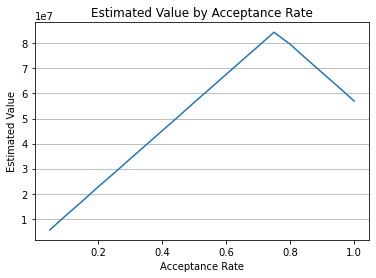

In [122]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated_Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [123]:
print(strat_df.loc[strat_df['Estimated_Value'] == np.max(strat_df['Estimated_Value'])])

   Acceptance Rate  Threshold  Bad Rate  num_accepted_loans  Avg_loan_amnt  \
5            0.750      0.493     0.000                8834      9,556.284   

   Estimated_Value  
5   84,420,212.364  


### Estimation of Expected Loss Based on 0.75 Acceptance Rate

In [124]:
test_preds_gbt = preds_df_gbt_amnt

In [125]:
test_preds_gbt['loss_given_default'] = 1

In [126]:
# Calculate the bank's expected loss and assign it to a new column
test_preds_gbt['expected_loss'] = test_preds_gbt['prob_default'] * test_preds_gbt['loan_amnt'] * test_preds_gbt['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_preds_gbt['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $41,295,723.22
